In [1]:
import skimage
import skimage.io
import skimage.transform
import pathlib
import numpy as np
import utils
import matplotlib.pyplot as plt
image_dir = pathlib.Path("images")
impaths = [
    image_dir.joinpath("page1.png"),
    image_dir.joinpath("page2.png"),
    image_dir.joinpath("page4.png"),
    image_dir.joinpath("page6.png"),
    image_dir.joinpath("page7.png"),
    image_dir.joinpath("page8.png"),
]

In [2]:
def create_binary_image(im):
    """Creates a binary image from a greyscale image "im"

    Args:
        im ([np.ndarray, np.float]): [An image of shape [H, W] in the range [0, 1]]

    Returns:
        [np.ndarray, np.bool]: [A binary image]
    """

    # START YOUR CODE HERE ### (You can change anything inside this block)
    binary_im = np.zeros_like(im, dtype=np.bool)
    fft_im = np.fft.fft2(im)
    visualize_im_fft = np.log(np.absolute(np.fft.fftshift(fft_im)) + 1)
    normalized_im_fft = (visualize_im_fft / (np.max(visualize_im_fft) - np.min(visualize_im_fft))) * 255 
    # Experimenting using GIMP threeshold we found that the line is clearly distinguised with values around 120 in the
    # 0-255 range of the freq. domain representation 
    for i in range(0, im.shape[0]):
        for j in range(0, im.shape[1]):
            binary_im[i, j] = 1 if normalized_im_fft[i, j] >= 120 else 0
    
    ### END YOUR CODE HERE ###
    return binary_im

C:\Users\Pablo\AppData\Local\Temp\ipykernel_5092\3273517866.py:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  binary_im = np.zeros_like(im, dtype=np.bool)
C:\Users\Pablo\AppData\Local\Temp\ipykernel_5092\757924958.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert im_binary.dtype == np.bool,            f"Expected the image to be of dtyp

Found angle: -21.81
Found angle: -89.00
Found angle: 26.82
Found angle: -25.32
Found angle: -67.44
Found angle: 89.50
Saving image to: image_processed\task4d.png


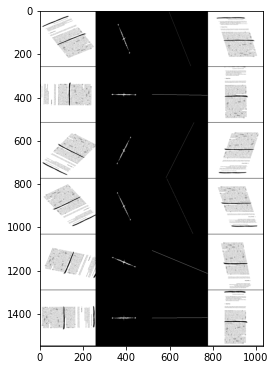

In [3]:
if __name__ == "__main__":
    # NO NEED TO EDIT THE CODE BELOW.
    verbose = True
    plt.figure(figsize=(4, 12))    
    plt.tight_layout()
    images_to_visualize = []
    for i, impath in enumerate(impaths):
        im = utils.read_im(str(impath))
        im_binary = create_binary_image(im)
        assert im_binary.dtype == np.bool,            f"Expected the image to be of dtype np.bool, got {im_binary.dtype}"
        angles, distances = utils.find_angle(im_binary)
        angle = 0
        if len(angles) > 0:
            angle = angles[0] * 180 / np.pi
        print(f"Found angle: {angle:.2f}")
        hough_im = utils.create_hough_line_image(im, angles, distances)
        rotated = skimage.transform.rotate(im, angle, cval=im.max())
        images_to_visualize.extend(
            [im, im_binary, hough_im, rotated]
        )
    image = utils.np_make_image_grid(images_to_visualize, nrow=len(impaths))
    utils.save_im("task4d.png", image)
    plt.imshow(image, cmap="gray")